In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importar Keras y TensorFlow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

# Cargar FASHION_MNIST desde Keras
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(f"\nDatos cargados:")
print(f"  - Train: {x_train_full.shape}")
print(f"  - Test: {x_test.shape}")


Datos cargados:
  - Train: (60000, 28, 28)
  - Test: (10000, 28, 28)


In [4]:
# Normalizar valores de píxeles a rango [0, 1]
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Aplanar las imágenes de 28x28 a vectores de 784
x_train_full = x_train_full.reshape((x_train_full.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

x_train, x_val = train_test_split(
    x_train_full,
    test_size=0.2,  # 20% para validación
    random_state=42
)

print(f"\nDivisión train/val:")
print(f"  - Train: {x_train.shape}")
print(f"  - Validación: {x_val.shape}")

# Dimensión del vector del espacio latente
latent_dim = 32



División train/val:
  - Train: (48000, 784)
  - Validación: (12000, 784)


In [5]:
# Crear el encoder
encoder_input = layers.Input(shape=(784,), name='encoder_input')
x = layers.Dense(128, activation='relu', name='encoder_dense_1')(encoder_input)
x = layers.Dense(64, activation='relu', name='encoder_dense_2')(x)
latent = layers.Dense(latent_dim, activation='relu', name='latent_space')(x)

# Modelo del encoder
encoder = models.Model(encoder_input, latent, name='encoder')

# Crear el decoder
decoder_input = layers.Input(shape=(latent_dim,), name='decoder_input')
x = layers.Dense(64, activation='relu', name='decoder_dense_1')(decoder_input)
x = layers.Dense(128, activation='relu', name='decoder_dense_2')(x)
decoder_output = layers.Dense(784, activation='sigmoid', name='decoder_output')(x)

# Modelo del decoder
decoder = models.Model(decoder_input, decoder_output, name='decoder')

# Conectar encoder y decoder
autoencoder_input = layers.Input(shape=(784,), name='autoencoder_input')
encoded = encoder(autoencoder_input)
decoded = decoder(encoded)

# Modelo completo del autoencoder
autoencoder = models.Model(autoencoder_input, decoded, name='autoencoder')

autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Para datos normalizados entre 0 y 1
    metrics=['mse']  # Error cuadrático medio adicional
)


Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.4854 - mse: 0.0864 - val_loss: 0.3238 - val_mse: 0.0279
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.3182 - mse: 0.0258 - val_loss: 0.3076 - val_mse: 0.0221
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3055 - mse: 0.0215 - val_loss: 0.3009 - val_mse: 0.0197
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2998 - mse: 0.0194 - val_loss: 0.2976 - val_mse: 0.0186
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2968 - mse: 0.0184 - val_loss: 0.2953 - val_mse: 0.0178
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.2945 - mse: 0.0176 - val_loss: 0.2936 - val_mse: 0.0174
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.2931 - mse: 0.0169 - val_loss: 0.2916 - val_mse: 0.0165
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2915 - mse: 0.0164 - val_loss: 0.2899 - val_mse: 0.0160
Epoch 9/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/

Text(0.5, 1.02, 'Comparación: Imágenes Originales vs Reconstruidas')

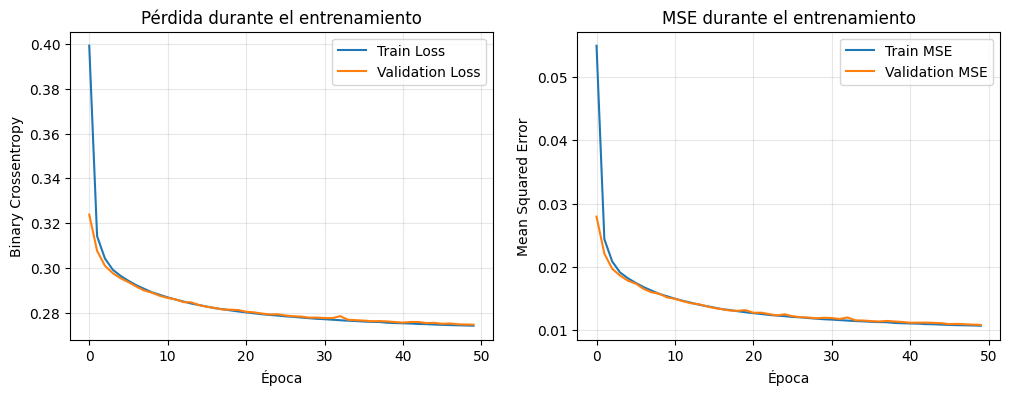

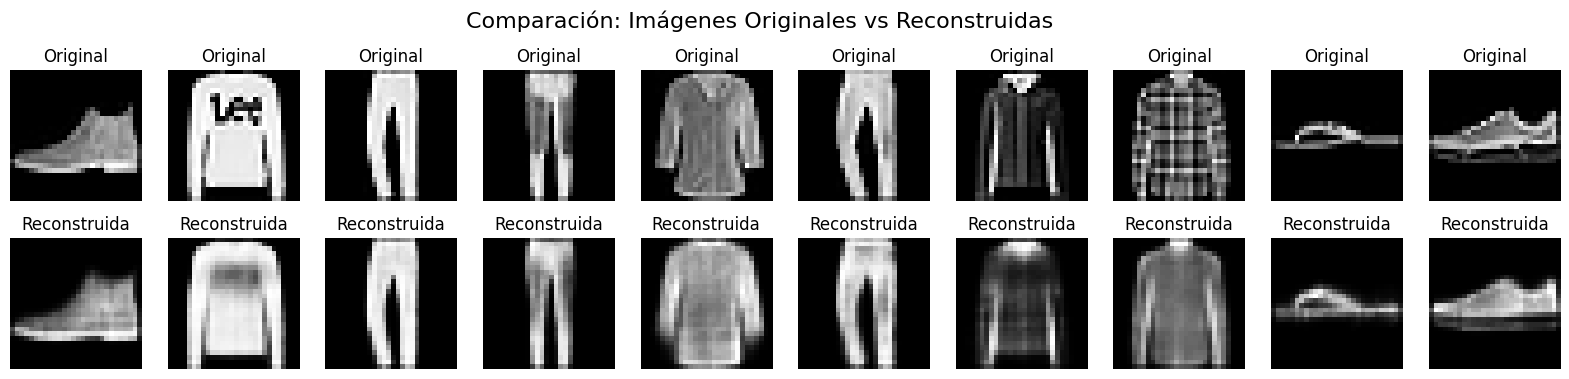

In [6]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_val, x_val),
    verbose=1
)

plt.figure(figsize=(12, 4))

# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Binary Crossentropy')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfica de MSE
plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('MSE durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Evaluar el modelo
test_loss, test_mse = autoencoder.evaluate(x_test, x_test, verbose=0)

# Visualizar reconstrucciones

# Seleccionar algunas imágenes de test
n_images = 10
test_sample = x_test[:n_images]

# Reconstruir usando el autoencoder
reconstructed = autoencoder.predict(test_sample, verbose=0)

# Visualizar originales vs reconstrucciones
plt.figure(figsize=(20, 4))
for i in range(n_images):
    # Imagen original
    plt.subplot(2, n_images, i + 1)
    plt.imshow(test_sample[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Imagen reconstruida
    plt.subplot(2, n_images, n_images + i + 1)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstruida')
    plt.axis('off')

plt.suptitle('Comparación: Imágenes Originales vs Reconstruidas', fontsize=16, y=1.02)


In [7]:
autoencoder.save('autoencoder.keras')